In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [2]:
df = pd.read_csv("./ECommerce_consumer behaviour.csv")
df.head() 

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [3]:
df.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce
2019500,458285,128787,42,2,19,3.0,123,4,1,4,produce,packaged vegetables fruits


In [4]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

* order_dow : siparişin verildiği gün
* order_hour_of_day : siparişin verildiği saat
* days_since_prior_order: sipariş geçmişi
* add_to_cart_order : sepete eklenen ürün sayısı
* reordered : yeniden sıralanmış


In [5]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [6]:
df.loc[(df['days_since_prior_order'].isnull()==True),'days_since_prior_order']=df['days_since_prior_order'].max() # boş sipariş geçmişi değerlerini Max ile doldurdum. 

In [7]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [8]:
min_value = df['days_since_prior_order'].min()

print("Min değer:", min_value)    # kontrol kanks.

Min değer: 0.0


In [9]:
max_value = df['days_since_prior_order'].max()

print("max değer:", max_value)

max değer: 30.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [11]:
df['days_since_prior_order'] = df['days_since_prior_order'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,2019501.0,1.707013e+06,985983.196234,10.0,852649.0,1705004.0,2559031.0,3421080.0
user_id,2019501.0,1.030673e+05,59491.165074,2.0,51584.0,102690.0,154600.0,206209.0
order_number,2019501.0,1.715138e+01,17.525765,1.0,5.0,11.0,24.0,100.0
order_dow,2019501.0,2.735367e+00,2.093882,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,2019501.0,1.343948e+01,4.241008,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,2019501.0,1.253211e+01,9.774603,0.0,5.0,8.0,19.0,30.0
product_id,2019501.0,7.120590e+01,38.207275,1.0,31.0,83.0,107.0,134.0
add_to_cart_order,2019501.0,8.363173e+00,7.150059,1.0,3.0,6.0,11.0,137.0
reordered,2019501.0,5.897427e-01,0.491880,0.0,0.0,1.0,1.0,1.0
department_id,2019501.0,9.928349e+00,6.282933,1.0,4.0,9.0,16.0,21.0


array([[<Axes: title={'center': 'order_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'order_number'}>],
       [<Axes: title={'center': 'order_dow'}>,
        <Axes: title={'center': 'order_hour_of_day'}>,
        <Axes: title={'center': 'days_since_prior_order'}>],
       [<Axes: title={'center': 'product_id'}>,
        <Axes: title={'center': 'add_to_cart_order'}>,
        <Axes: title={'center': 'reordered'}>],
       [<Axes: title={'center': 'department_id'}>, <Axes: >, <Axes: >]],
      dtype=object)

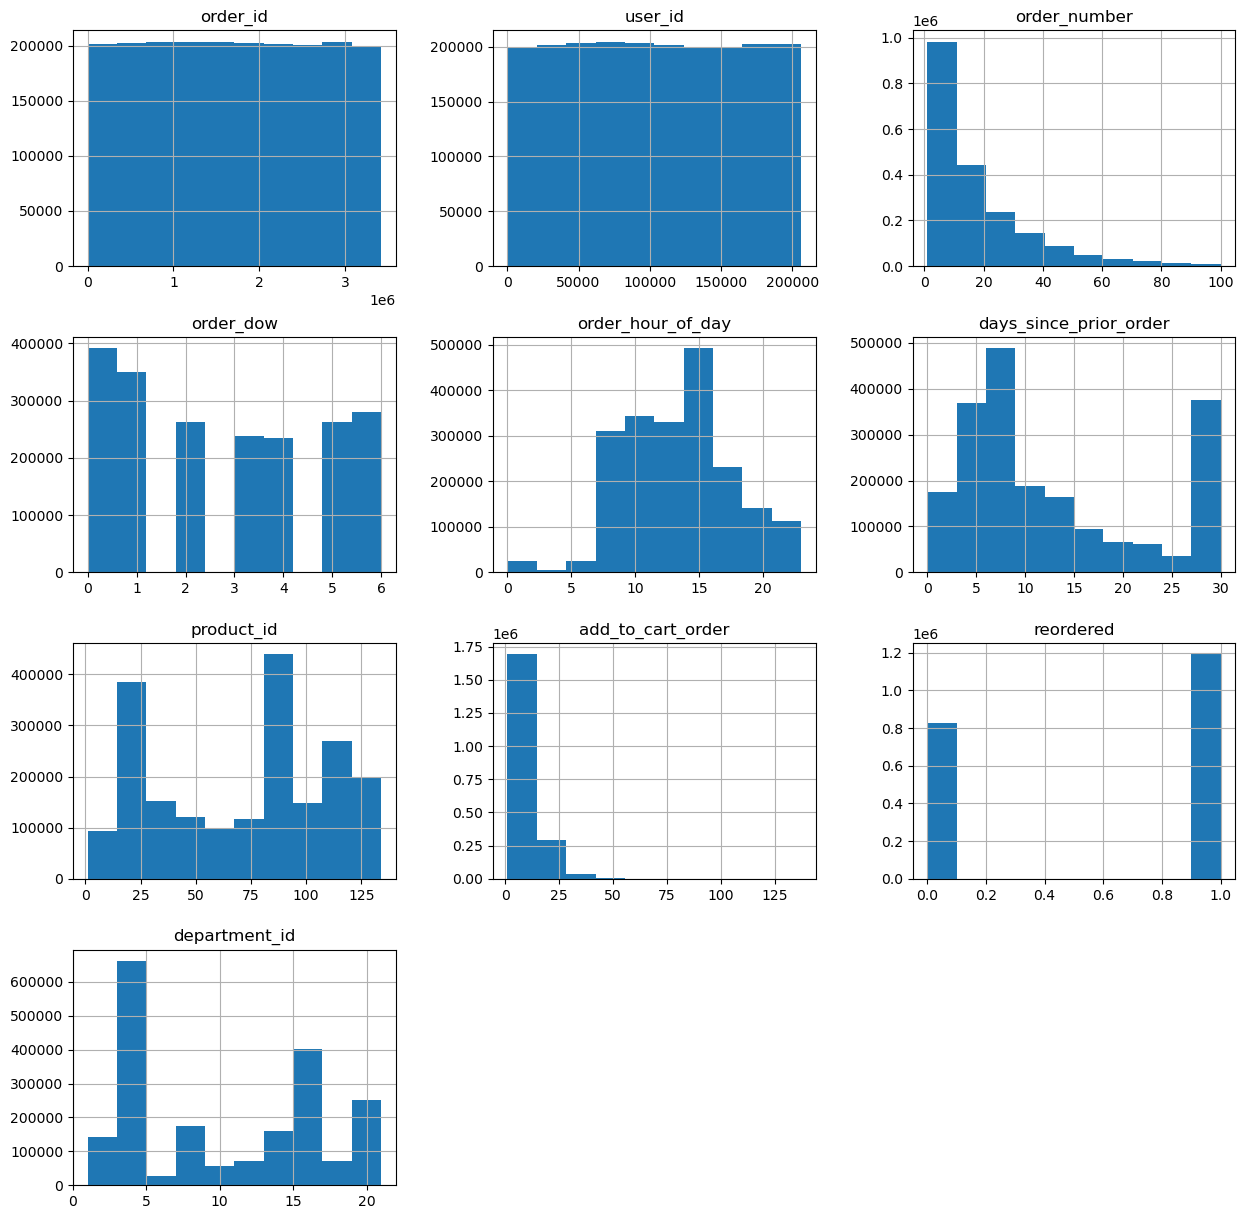

In [14]:
df.hist(figsize=(15,15))

### Korelasyon matrisi Çizimi;

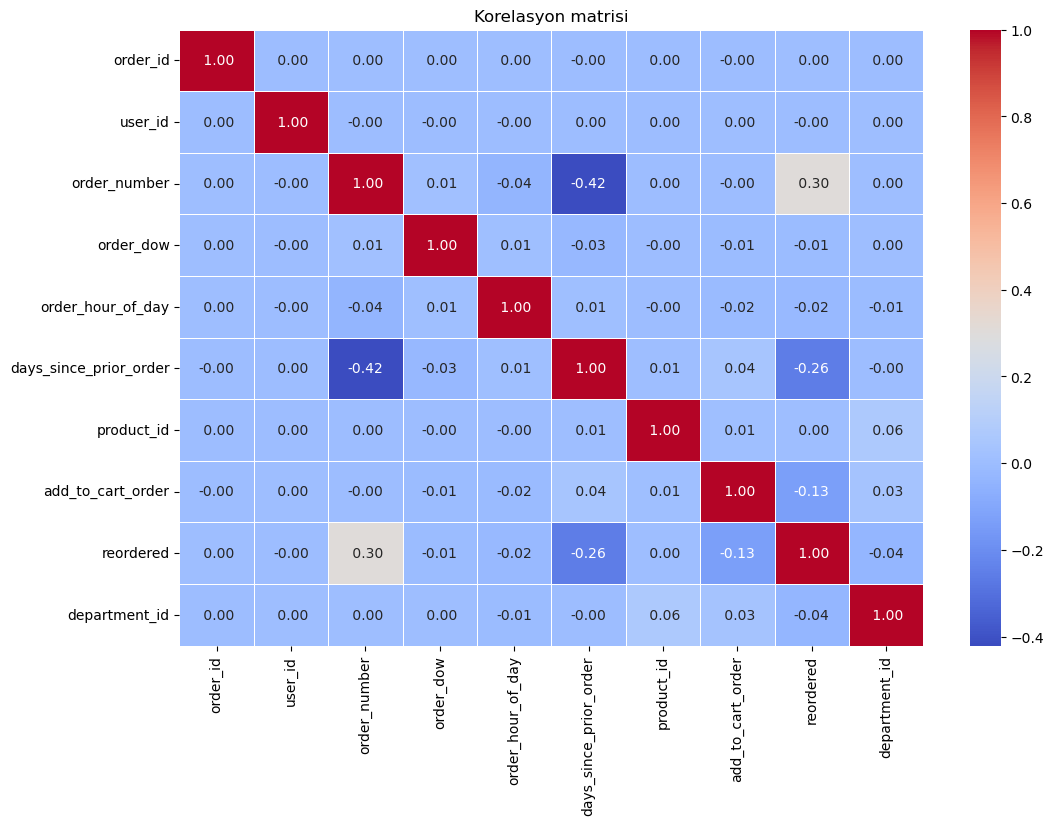

In [15]:
corr_matrix = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=' .2f', linewidths = .5)
plt.title('Korelasyon matrisi')
plt.show()

### Departmanlardaki ürün adetleri;


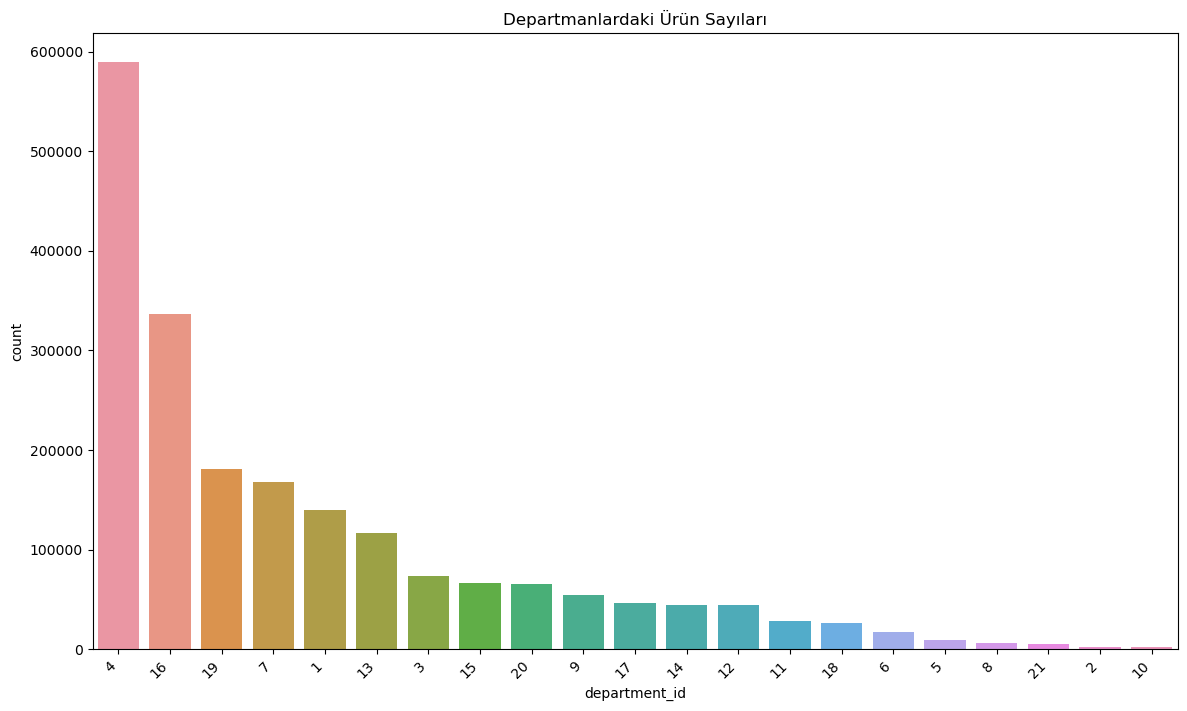

In [16]:
plt.figure(figsize=(14,8))
sns.countplot(x='department_id',data=df,order=df['department_id'].value_counts().index)
plt.title('Departmanlardaki Ürün Sayıları')
plt.xticks(rotation=45,ha='right')
plt.show()

### En çok satılan 25 ürün

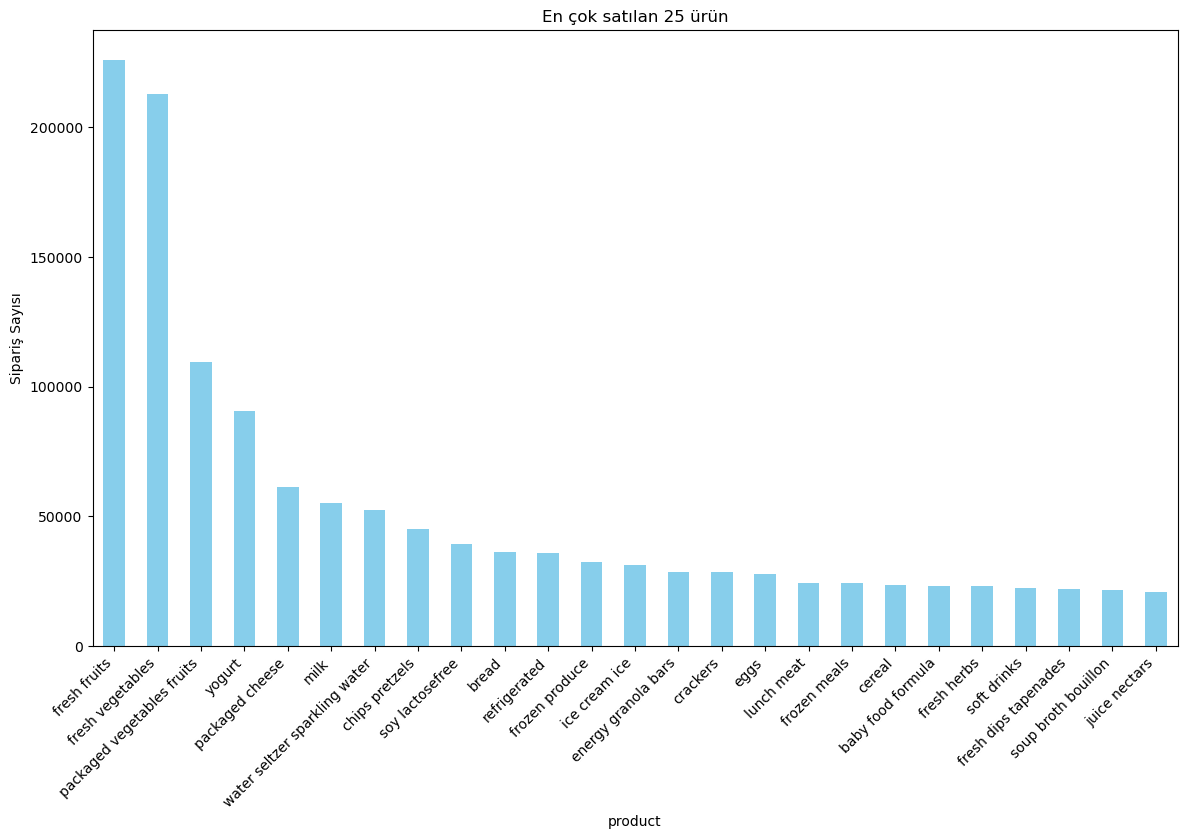

In [17]:
product_counts = df['product_name'].value_counts()

top_products = product_counts.head(25)


plt.figure(figsize=(14,8))
top_products.plot(kind='bar',color='skyblue')
plt.title('En çok satılan 25 ürün')
plt.xlabel('product')
plt.ylabel('Sipariş Sayısı')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### Birlikte satılan en iyi 50 çift

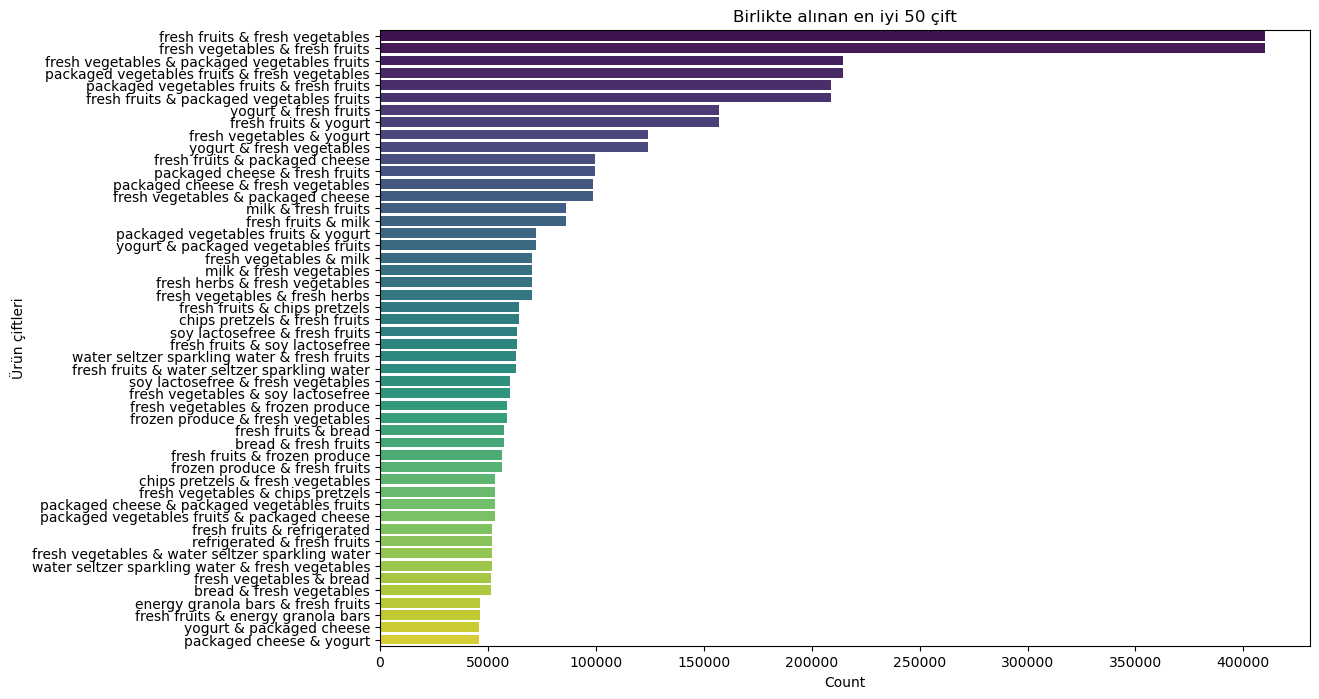

In [18]:
order_products = df[['order_id', 'product_name']]

merged_products = pd.merge(order_products, order_products, on = 'order_id')
                    
co_purchased_products = merged_products[merged_products['product_name_x'] != merged_products['product_name_y']][['product_name_x', 'product_name_y']]
                    

                    
common_pairs = co_purchased_products.value_counts().reset_index(name='count')
top_pairs = common_pairs.head(50)

                    
                    
plt.figure(figsize=(12,8))
sns.barplot(x = 'count', y = top_pairs['product_name_x'].astype(str) + ' & ' + top_pairs['product_name_y'].astype(str), data = top_pairs, palette = 'viridis')
plt.title('Birlikte alınan en iyi 50 çift') 
plt.xlabel('Count')
plt.ylabel('Ürün çiftleri')
plt.show()

## Optimum Küme Sayısının Belirlenmesi: 

##### Elbow Yöntem

In [19]:
# Sadece sayısal sütunlar
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 'order_id' ve 'user_id' sütunlarını hariç
columns_to_exclude = ['order_id', 'user_id','department','product_name']
numerical_df = numerical_df.drop(columns=columns_to_exclude, errors='ignore')

In [20]:
ssd = [] # uzaklık farklarının karelerinin toplamı
K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(numerical_df)
    ssd.append(kmeans.inertia_)

In [21]:
# Sadece sayısal sütunlar
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 'order_id' ve 'user_id' sütunlarını hariç
columns_to_exclude = ['order_id', 'user_id','department','product_name']
numerical_df = numerical_df.drop(columns=columns_to_exclude, errors='ignore')

ssd = [] # uzaklık farklarının karelerinin toplamı
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(numerical_df)
    ssd.append(kmeans.inertia_)

Text(0.5, 1.0, 'Optimum küme sayısı için elbow yönt.')

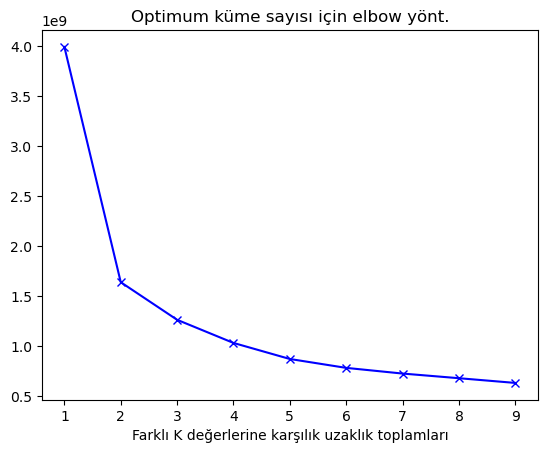

In [22]:
plt.plot(K,ssd, "bx-")
plt.xlabel("Farklı K değerlerine karşılık uzaklık toplamları")
plt.title("Optimum küme sayısı için elbow yönt.")

##### Yellowbrick  Yöntem

In [23]:
!pip install yellowbrick

In [24]:
from yellowbrick.cluster import KElbowVisualizer

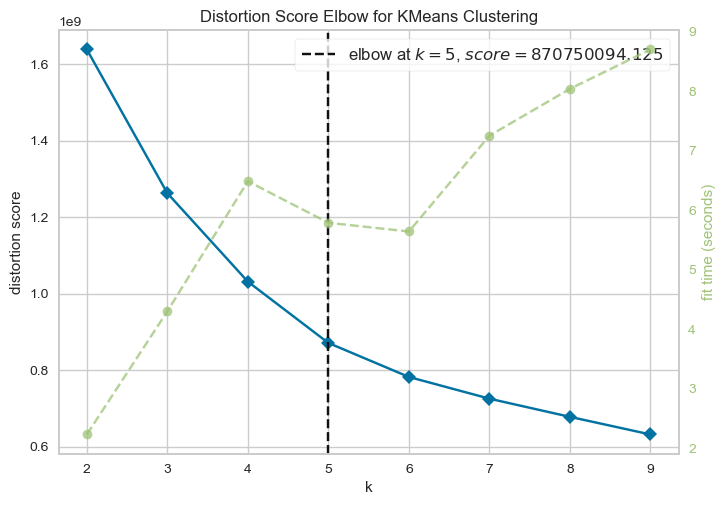

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(numerical_df)
visu.poof()

Bu kadar da nokta atışı atılmaz ki be !

##### Temel Bileşen Analizi

In [26]:
from sklearn.preprocessing import StandardScaler # önce standartlaştırma
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
df1 = StandardScaler().fit_transform(numerical_df)

In [28]:
df1[0:5,0:5]

array([[-0.92157926, -0.35119813,  1.07533889,  1.78706954, -1.4187329 ],
       [-0.92157926, -0.35119813,  1.07533889,  1.78706954,  0.51807151],
       [-0.92157926, -0.35119813,  1.07533889,  1.78706954, -0.92144528],
       [-0.92157926, -0.35119813,  1.07533889,  1.78706954,  0.30868725],
       [-0.92157926, -0.35119813,  1.07533889,  1.78706954,  0.30868725]])

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df1)

In [31]:

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen","ikinci_bilesen"])

In [32]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,-2.153101,-1.290533
1,-2.200526,0.088606
2,-2.211452,-0.591620
3,-2.175564,-1.117623
4,-2.195317,-1.051016
...,...,...
2019496,-0.232872,-0.458739
2019497,1.931388,-0.257401
2019498,1.940751,-1.625536
2019499,1.920999,-1.558929


In [33]:
pca.explained_variance_ratio_

array([0.20940465, 0.13532046])

Birinci bileşen, veri kümesinin toplam varyansının yaklaşık %20.94'ünü açıklar.
İkinci bileşen, veri kümesinin toplam varyansının yaklaşık %13.53'ünü açıklar.

Birinci ve ikinci bileşenlerin toplam varyansın yaklaşık %34.47'sini açıkladığı görülüyor. Bu, veri kümesinin önemli bir kısmının iki bileşenle temsil edilebileceği anlamına gelir.

In [34]:
pca = PCA(n_components=4)
pca_fit = pca.fit_transform(df1)

In [35]:

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["1._bilesen","2._bilesen","3._bilesen","4._bilesen"])

In [36]:
bilesen_df

,1._bilesen,2._bilesen,3._bilesen,4._bilesen
0,-2.153101,-1.290533,-0.555653,-0.086219
1,-2.200526,0.088606,-1.503028,-0.648989
2,-2.211452,-0.591620,-0.753652,-0.153488
3,-2.175564,-1.117623,-0.791518,-0.396749
4,-2.195317,-1.051016,-0.716225,-0.343726
...,...,...,...,...
2019496,-0.232872,-0.458739,-0.420952,0.595840
2019497,1.931388,-0.257401,-1.458310,-0.555496
2019498,1.940751,-1.625536,-0.250045,0.185724
2019499,1.920999,-1.558929,-0.174752,0.238747


In [37]:
pca.explained_variance_ratio_

array([0.20940465, 0.13532046, 0.1278871 , 0.12587033])

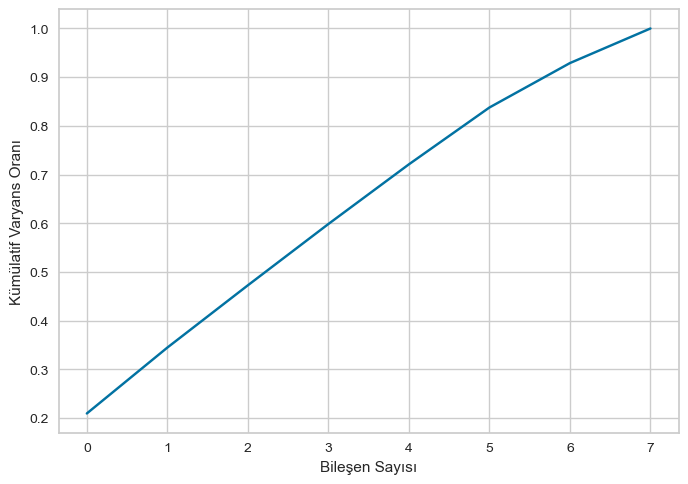

In [38]:
## Optimum bileşen sayısına karar vermek
pca = PCA().fit(df1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

In [50]:
clst_prd = pd.crosstab(df['user_id'], df['department'])
clst_prd

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,3,3
3,0,0,0,1,0,0,0,5,0,0,...,1,0,0,0,0,1,0,0,6,3
7,0,0,1,7,0,0,2,4,3,0,...,0,0,1,0,0,0,0,0,2,3
10,0,0,0,0,0,0,0,5,4,0,...,0,0,4,0,0,4,0,0,13,0
11,0,0,0,3,0,0,0,2,0,0,...,0,0,0,0,0,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206204,0,0,1,0,0,0,0,6,0,2,...,0,0,1,0,0,0,0,1,4,0
206205,0,0,1,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,3,0
206206,0,0,0,2,0,0,0,1,1,0,...,0,1,1,0,0,0,0,0,1,4


In [51]:
X_train = clst_prd.values

# Keşif İçin 6 Küme İle Başlıyorum
kmeans = KMeans(n_clusters=6, random_state=540)
kmeans = kmeans.fit(X_train)

# Her Gözlem İçin Atanan Küme Numarasını Yazdırma
print("The cluster are  :", kmeans.labels_)

# İnertia Değerini
print("The Inertia is :", kmeans.inertia_)

The cluster are  : [0 5 4 ... 0 5 4]
The Inertia is : 4996208.424404016


In [52]:
# 5 Küme Üzerinde K-Means
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)

kmeans.labels_

# Yeni Veriler için Tahminler
predictions = kmeans.predict(X_train)

# Küme için Sayıları Hesaplama
unique , counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Çizimi oluşturma
countscldf = pd.DataFrame(counts, columns=["Cluster 0 ", "Cluster 1" , "Cluster 2", "Cluster 3", "Cluster 4"])

countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,6184,1927,8043,26321,62798


Explained variance ratio (first two components): [0.59064731 0.1373943 ]


<Figure size 800x550 with 0 Axes>

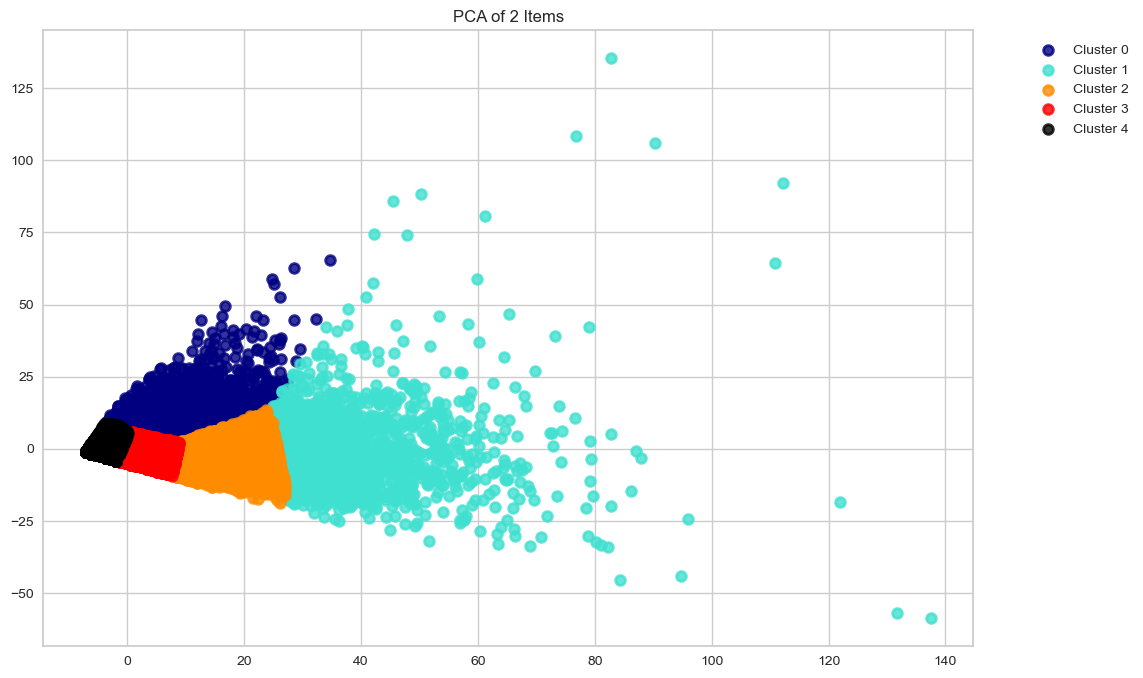

In [54]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"]

pca = PCA(n_components=2, random_state = 42)
X_r = pca.fit(X).transform(X)


# Her Bileşen İçin Açıklanan Varyansın Yüzdesi
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Veri Noktaları
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3,4], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of 2 Items')
plt.show()